# CS647 Image Processing
## Exercise 1  (17.02.2026)

# Task 1: Image Operations in Python

* Load and display a color image
* Split the image into its red, green and blue channels
* Generate a gray-level image by averaging over the color channels
* Binarize the resulting gray level image (set to 0 all values below 128, to 255 all values above 128)
* Save the resulting image

In [31]:
# install packages

%pip install opencv-python scipy matplotlib pooch

Note: you may need to restart the kernel to use updated packages.


In [32]:
# imports, install potential missing packages as discussed
from scipy import ndimage
import cv2
import numpy as np

In [33]:
from scipy import datasets
f = datasets.face()

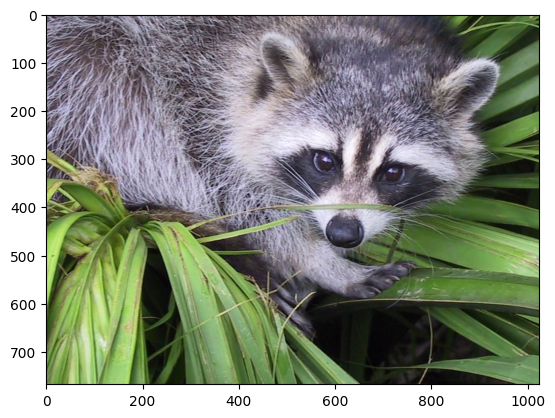

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [35]:
# Read RGB value at pixel 1,1
f[1,1,:]


array([110, 103, 121], dtype=uint8)

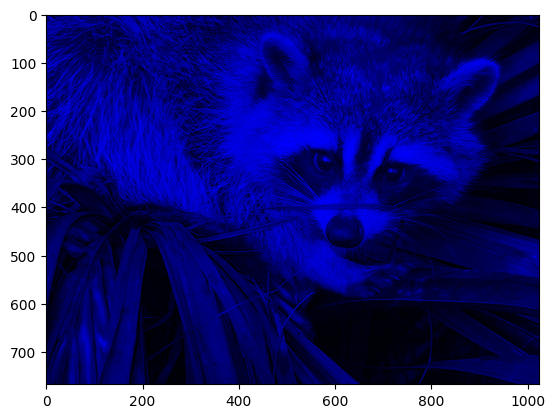

In [36]:
#splitting of colour channels
f.shape[0]
red_image = f.copy()

red_image[:,:,1]=0
red_image[:,:,2]=0
green_image = f.copy()
green_image[:,:,0]=0
green_image[:,:,2]=0
blue_image = f.copy()
blue_image[:,:,0]=0
blue_image[:,:,1]=0
plt.imshow(blue_image)
plt.show()


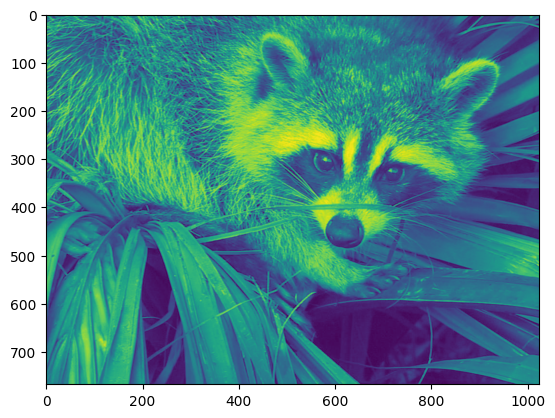

(768, 1024, 3)

In [37]:
#Compute a gray value image as average over the three colour channels in  gray_array
import numpy as np

gray_array = np.mean(f, axis=2)
grayimage_3d = np.stack((gray_array,)*3, axis=-1)

# 3D gray image
plt.imshow(gray_array)
plt.show()

grayimage_3d.shape

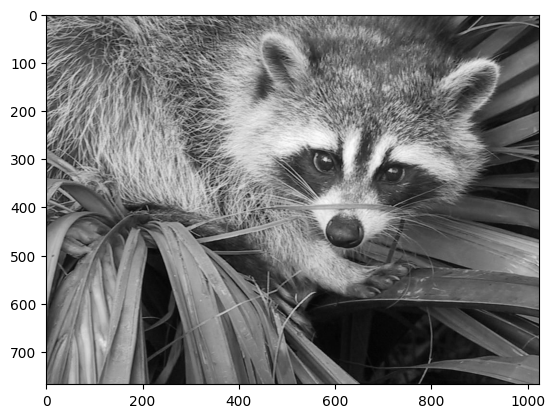

(768, 1024)

In [38]:
# 2D gray image
grayimage_2d = gray_array.astype(np.uint8)

plt.imshow(grayimage_2d,cmap='gray',vmin=0,vmax=255)
plt.show()

grayimage_2d.shape


Now, binarize the image:

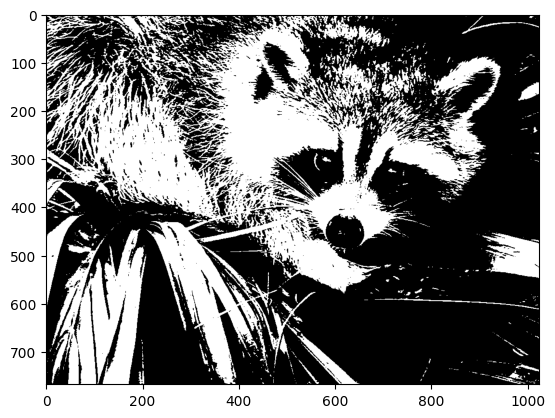

In [39]:
#Implement the binarization of this image with threshold 128
bin_array = np.zeros((f.shape[0],f.shape[1]),dtype='uint8')

bin_array[grayimage_2d >= 128] = 255

plt.imshow(bin_array,cmap='gray')
plt.show()

In [40]:
# pay attention to data types
# Computations: Pillow modes only offer 1-bit pixels, 8-bit pixels, 32-bit signed integer pixels, and 32-bit floating point pixels. Source: https://pillow.readthedocs.io/en/stable/reference/Image.html
# Images: Most standard image formats like PNG, JPEG, and BMP are designed for 8-bit (28=256 levels) per channel.
from PIL import Image

print(grayimage_2d.dtype)
grayimage_2d_uint8 = grayimage_2d.astype("uint8")
print(grayimage_2d_uint8.dtype)

result = Image.fromarray(grayimage_2d_uint8)


result.save('out.bmp')
result.save("out.jpg")
result.save('out.png')

uint8
uint8


# Task 2: Image Histograms

* Plot the histgram of the image
* Modify the grayvalue range of the image by adding/substracting a constant value. Display the resulting image and its histogram. What do you observe?
* Modify the grayvalue range by multiplying a constant value. What do you observe?
* Correct one of the resulting images using the function imadjust / histeq. What do you observe on the histogram, the cumulative histogram and the adjusted image?

### Image Histogram:

In [41]:
len(grayimage_2d)

768

In [42]:
def image_hist(img, n_bins = 10):
    flat_list = [item for sublist in img for item in sublist]
    return np.histogram(img, bins=n_bins, range=(0, 255))

(256,) (257,)


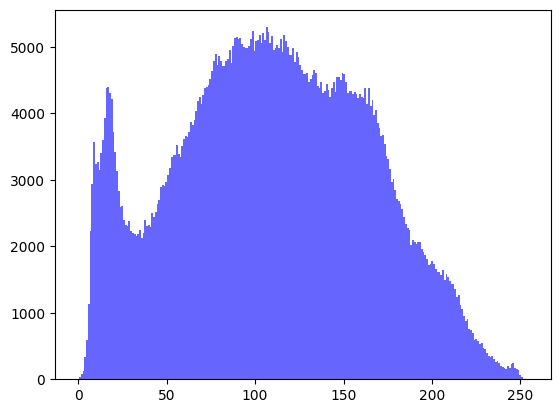

In [43]:
# show image histogramm
n_bins = 256
hist_org, bins_org = image_hist(grayimage_2d, n_bins) # 256 -> 1 bin / value (0,256)
n_pixel = grayimage_2d.size

# inspect histograms
print(hist_org.shape, bins_org.shape)
#print(np.diff(bins_org))

fig=plt.figure()
ax=fig.add_subplot(111)
plt.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
plt.show()

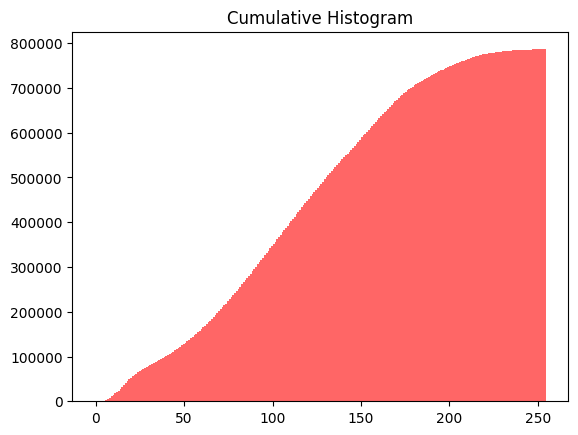

In [44]:
# plot cummulative histogram
cum_hist = hist_org.cumsum()

fig=plt.figure()
ax=fig.add_subplot(111)
plt.bar(bins_org[:-1], cum_hist, width=np.diff(bins_org), color='red', alpha=0.6)
plt.title("Cumulative Histogram")
plt.show()

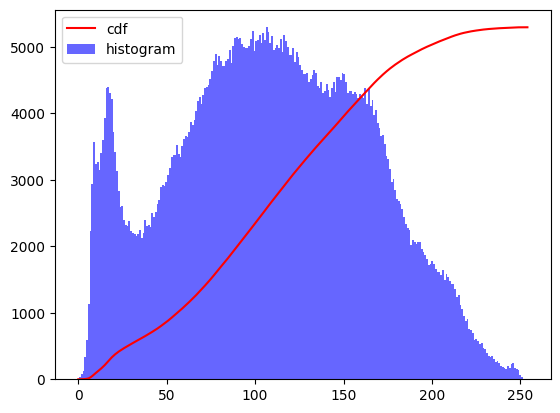

In [45]:
# plot both together

# normalize cummulative histogram
cum_hist = hist_org.cumsum()
cum_hist_norm = cum_hist * hist_org.max() / cum_hist.max()

fig=plt.figure()
ax=fig.add_subplot(111)
plt.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
plt.plot(bins_org[:-1], cum_hist_norm, color="red")
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.show()


### Histogram shifting:

In [46]:
#Implement Adding / Subtracting of a constant

def add_constant(image, constant:float=0.0):
    return np.clip(image.astype(np.float64) + constant, 0, 255).astype(np.uint8)

# np.clip keeps pixel values in range (0,256)

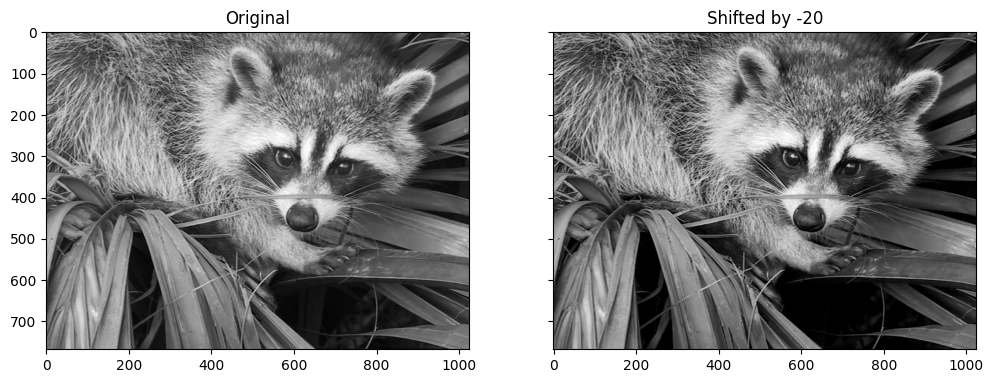

In [47]:
const = -20
grayimage_shifted = add_constant(grayimage_2d,constant=const)

# visualize
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayimage_2d, cmap = "gray")
ax1.set_title("Original")
ax2.imshow(grayimage_shifted,cmap = "gray")
ax2.set_title(f"Shifted by {const}")
plt.show()

5297
52608


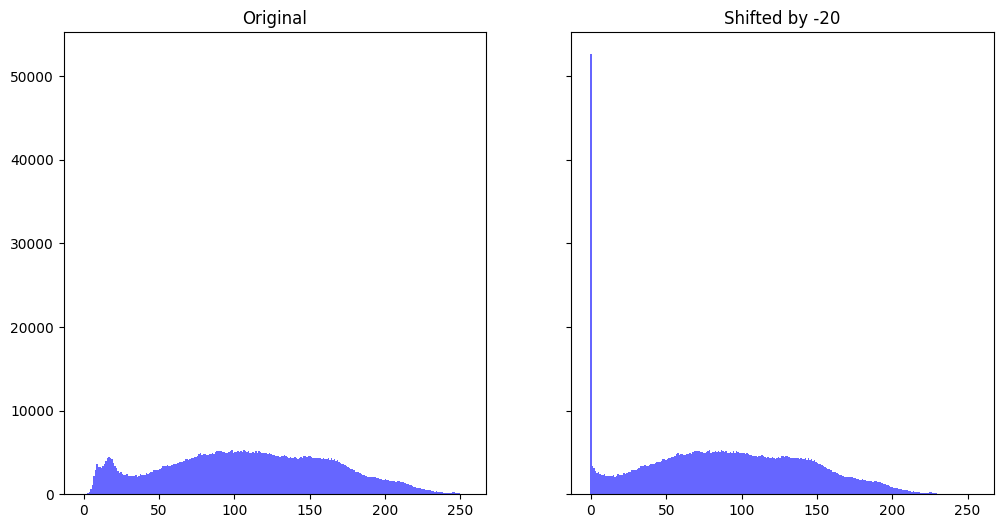

In [48]:
hist_shifted,bins_shifted = image_hist(grayimage_shifted, n_bins)

#compare
print(max(hist_org))
print(max(hist_shifted))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_shifted[:-1],hist_shifted,width=np.diff(bins_shifted), color='blue',alpha=0.6)
ax2.set_title(f"Shifted by {const}")
plt.show()


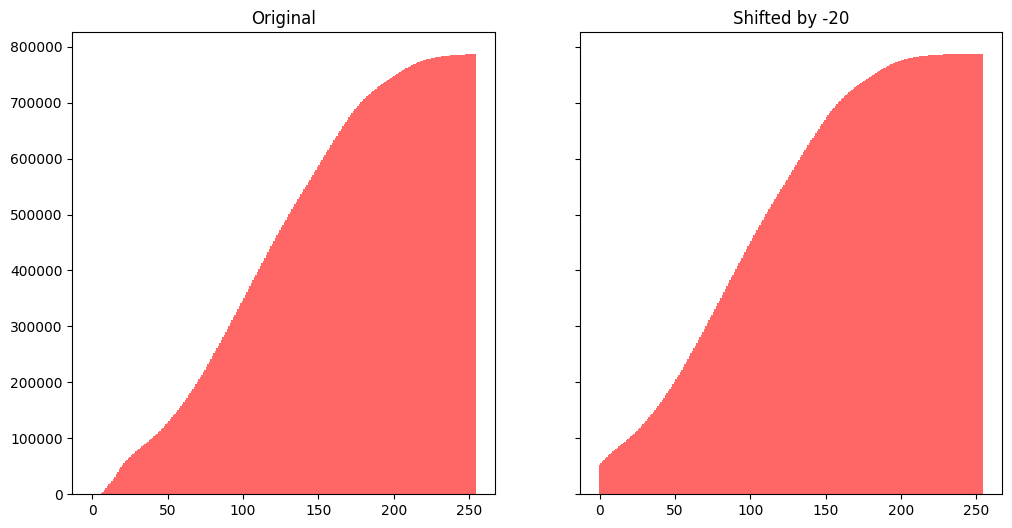

In [49]:
# plot cummulative histograms
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1], hist_org.cumsum(),width=np.diff(bins_org), color='red',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_shifted[:-1], hist_shifted.cumsum(),width=np.diff(bins_shifted), color='red',alpha=0.6)
ax2.set_title(f"Shifted by {const}")
plt.show()

### Histogram scaling:

In [50]:
#Implement the multiplication of the image with a constant value
def mult_constant(image, constant=0.0):
    return np.clip(image.astype(np.float64) * constant, 0, 255).astype(np.uint8)

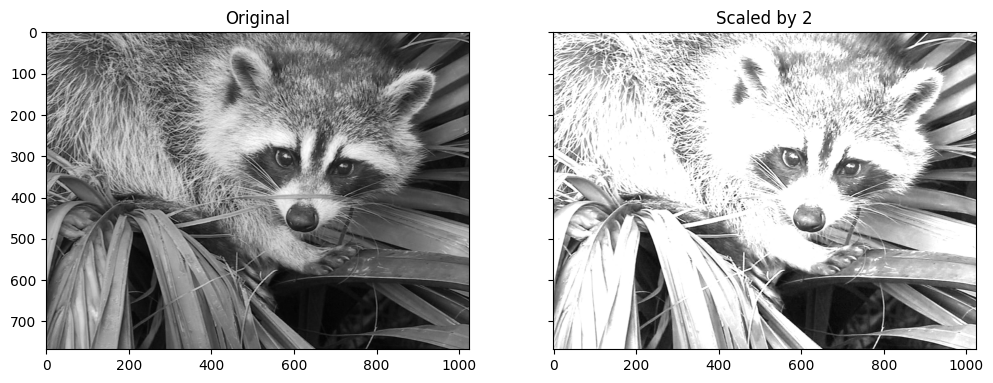

In [51]:
constant = 2

grayimage_scaled = mult_constant(grayimage_2d,constant=constant)

# visualize
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayimage_2d, cmap = "gray")
ax1.set_title("Original")
ax2.imshow(grayimage_scaled,cmap = "gray")
ax2.set_title(f"Scaled by {constant}")
plt.show()

5297
304635


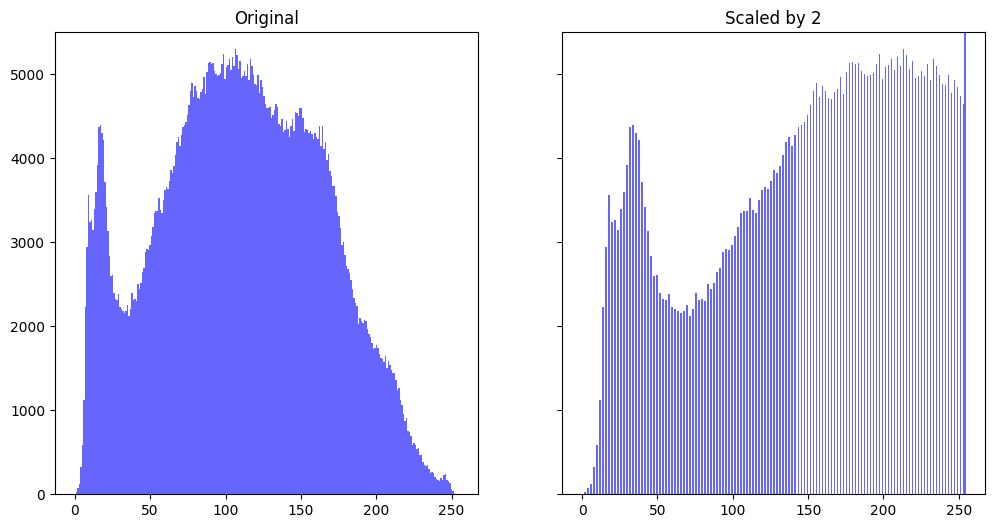

In [52]:
hist_scaled,bins_scaled = image_hist(grayimage_scaled, n_bins)

#compare
print(max(hist_org))
print(max(hist_scaled))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_scaled[:-1],hist_scaled,width=np.diff(bins_scaled), color='blue',alpha=0.6)
ax2.set_title(f"Scaled by {constant}")
ax1.set_ylim(ymin=0,ymax= 5500)
plt.show()

# y-axis changed from [0,5k] -> [0,300k]

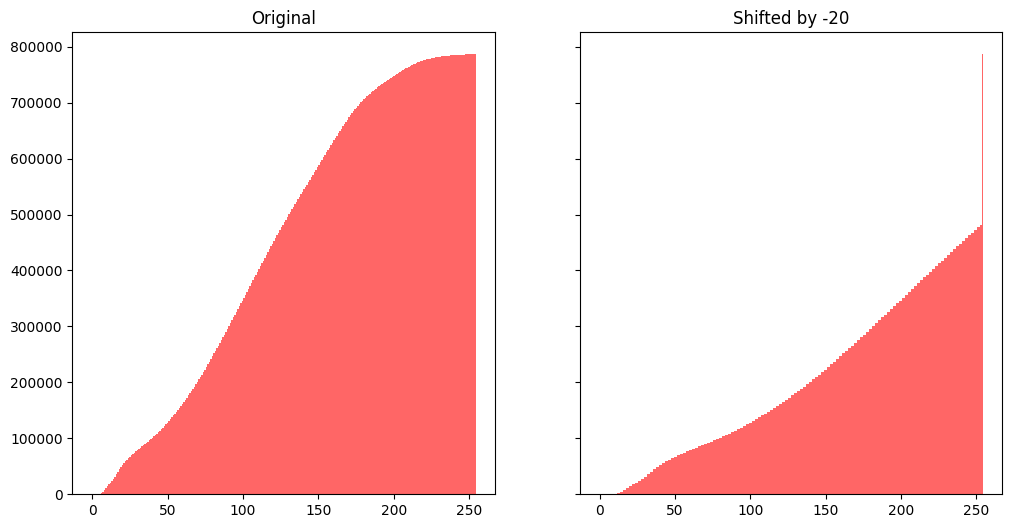

In [53]:
# plot cummulative histograms
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1], hist_org.cumsum(),width=np.diff(bins_org), color='red',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_scaled[:-1], hist_scaled.cumsum(),width=np.diff(bins_scaled), color='red',alpha=0.6)
ax2.set_title(f"Shifted by {const}")
plt.show()

### Histogram equalization:

In [54]:
def hist_equalization(img, n_bins):
    assert img.ndim == 2, 'gray scale image only'
    hist,bins = np.histogram(img.flatten(),n_bins ,[0,256])

    cdf = np.cumsum(hist)
    
    # 1. Mask zeros to avoid stretching 'empty' bins
    cdf_m = np.ma.masked_equal(cdf, 0)
    
    # 2. Scaling Formula: (val - min) * 255 / (max - min)
    # This ensures the lowest count becomes 0 and the highest becomes 255
    cdf_scaled = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    
    # 3. Fill the masked values back with 0
    yp = np.ma.filled(cdf_scaled, 0).astype('uint8')
    
    # 4. Interpolate using the scaled CDF
    xp = bins[:-1]
    img_equalized = np.interp(img.flatten(), xp, yp).reshape(img.shape)

    return img_equalized


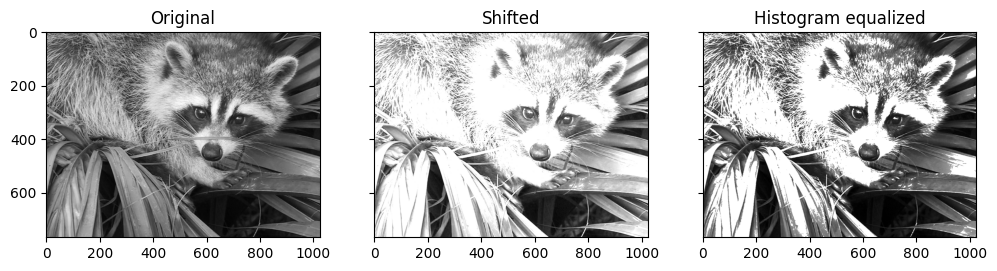

In [55]:
grayimage_equalized = hist_equalization(grayimage_scaled,n_bins)

# visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayimage_2d, cmap = "gray")
ax1.set_title("Original")
ax2.imshow(grayimage_scaled, cmap = "gray")
ax2.set_title("Shifted")
ax3.imshow(grayimage_equalized,cmap = "gray")
ax3.set_title(f"Histogram equalized")
plt.show()



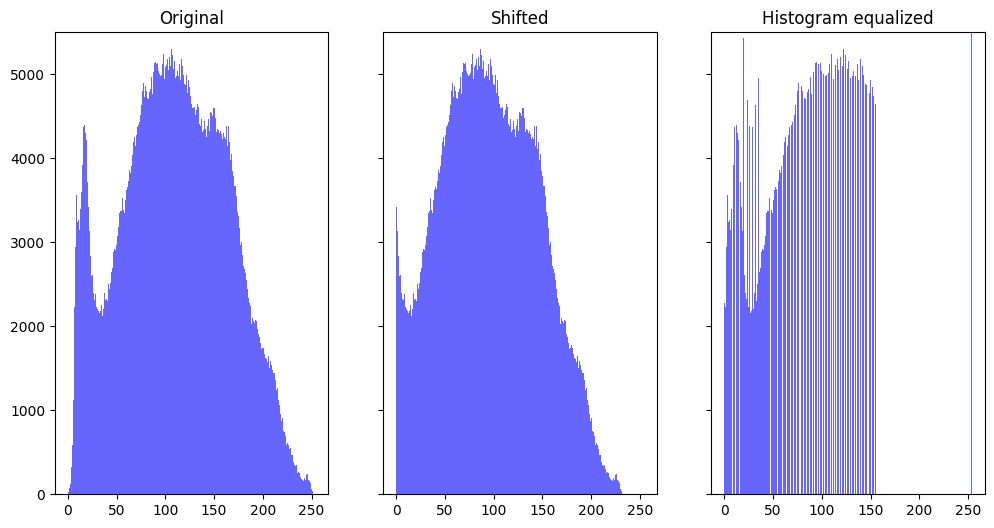

In [56]:
hist_eq, bins_eq = image_hist(grayimage_equalized, n_bins)

# plot histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_shifted[:-1],hist_shifted,width=np.diff(bins_shifted), color='blue',alpha=0.6)
ax2.set_title(f"Shifted")
ax3.bar(bins_eq[:-1],hist_eq,width=np.diff(bins_eq), color='blue',alpha=0.6)
ax3.set_title(f"Histogram equalized")
ax1.set_ylim(ymin=0,ymax = 5500)
plt.show()

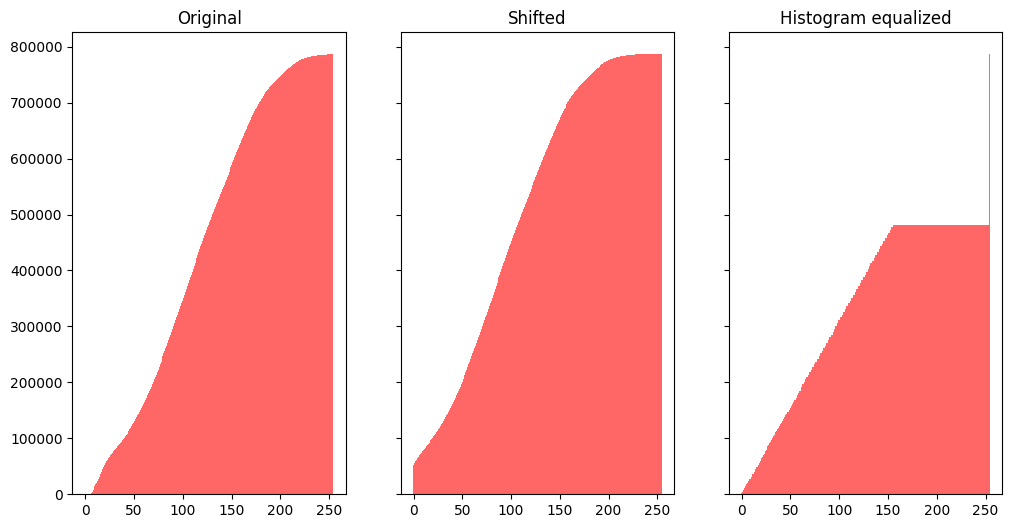

In [57]:
# plot cumulative histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org.cumsum(),width=np.diff(bins_org), color='red',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_shifted[:-1],hist_shifted.cumsum(),width=np.diff(bins_shifted), color='red',alpha=0.6)
ax2.set_title(f"Shifted")
ax3.bar(bins_eq[:-1],hist_eq.cumsum(),width=np.diff(bins_eq), color='red',alpha=0.6)
ax3.set_title(f"Histogram equalized")
plt.show()

### Gamma Correction: 


In [58]:
# define function to look up gamma correction
import cv2


def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    assert image.dtype == 'uint8', f"expected uint8, but got: {image.dtype}"

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

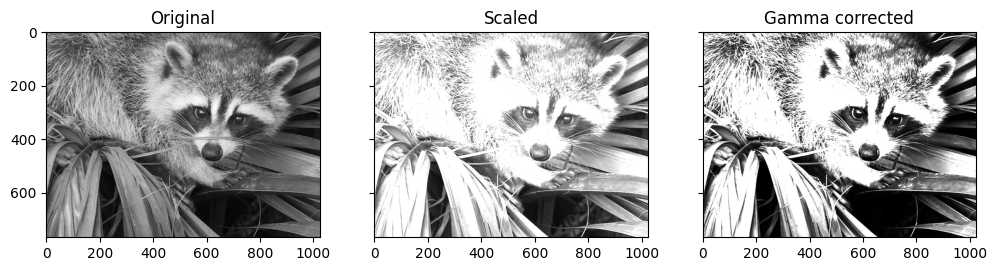

In [59]:
# try out different gamma values:  gamma = 0.3
gamma = 0.4

grayimage_gamma=adjust_gamma(grayimage_scaled.astype('uint8'),gamma)

# visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayimage_2d, cmap = "gray")
ax1.set_title("Original")
ax2.imshow(grayimage_scaled, cmap = "gray")
ax2.set_title("Scaled")
ax3.imshow(grayimage_gamma,cmap = "gray")
ax3.set_title(f"Gamma corrected")
plt.show()

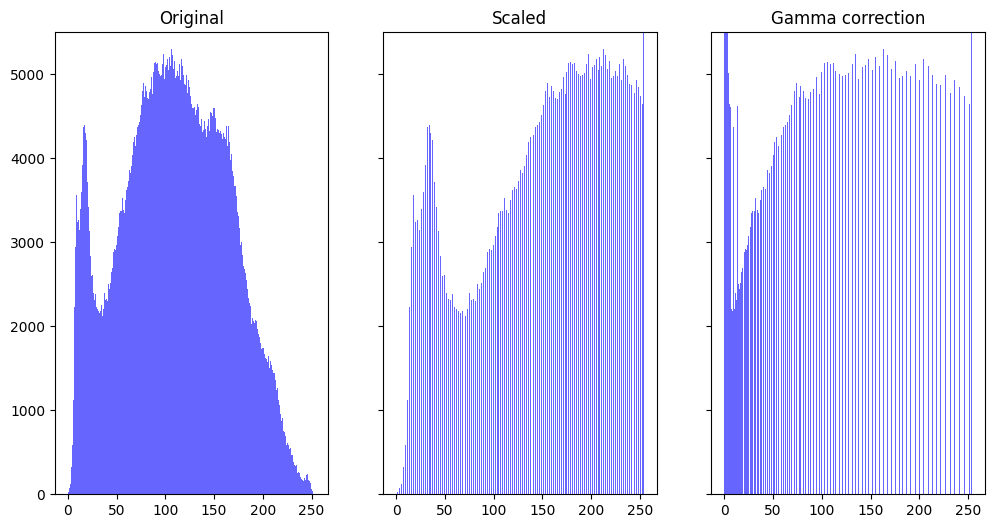

In [60]:
hist_gc, bins_gc = image_hist(grayimage_gamma, n_bins)

# plot histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org,width=np.diff(bins_org), color='blue',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_scaled[:-1],hist_scaled,width=np.diff(bins_scaled), color='blue',alpha=0.6)
ax2.set_title(f"Scaled")
ax3.bar(bins_gc[:-1],hist_gc,width=np.diff(bins_gc), color='blue',alpha=0.6)
ax3.set_title(f"Gamma correction")
ax3.set_ylim(ymin=0, ymax= 5500)
plt.show()

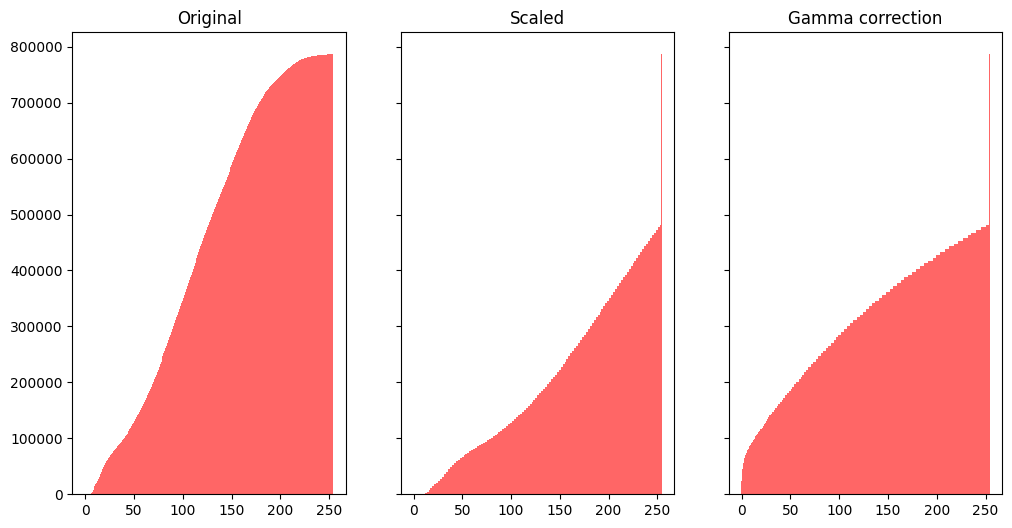

In [61]:
# plot cummulative histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.bar(bins_org[:-1],hist_org.cumsum(),width=np.diff(bins_org), color='red',alpha=0.6)
ax1.set_title("Original")
ax2.bar(bins_scaled[:-1],hist_scaled.cumsum(),width=np.diff(bins_scaled), color='red',alpha=0.6)
ax2.set_title(f"Scaled")
ax3.bar(bins_gc[:-1],hist_gc.cumsum(),width=np.diff(bins_gc), color='red',alpha=0.6)
ax3.set_title(f"Gamma correction")
plt.show()